In [ ]:
import pandas as pd
import csv
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import seaborn as sb

In [ ]:
test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'

train_news = pd.read_csv(train_filename)
test_news = pd.read_csv(test_filename)
valid_news = pd.read_csv(valid_filename)

In [ ]:
def data_obs():
    print("training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))

    print("test dataset size:")
    print(test_news.shape)
    print(test_news.head(10))
    
    print("validity dataset size:")
    print(valid_news.shape)
    print(valid_news.head(10))

data_obs()

training dataset size:
(10240, 2)
                                           Statement  Label
0  Says the Annies List political group supports ...  False
1  When did the decline of coal start? It started...   True
2  Hillary Clinton agrees with John McCain "by vo...   True
3  Health care reform legislation is likely to ma...  False
4  The economic turnaround started at the end of ...   True
5  The Chicago Bears have had more starting quart...   True
6  Jim Dunnam has not lived in the district he re...  False
7  I'm the only person on this stage who has work...   True
8  However, it took $19.5 million in Oregon Lotte...   True
9  Says GOP primary opponents Glenn Grothman and ...   True
test dataset size:
(2551, 2)
                                           Statement  Label
0  Building a wall on the U.S.-Mexico border will...   True
1  Wisconsin is on pace to double the number of l...  False
2  Says John McCain has done nothing to help the ...  False
3  Suzanne Bonamici supports a plan t

In [ ]:
def create_distribution(dataFile):
    
    return sb.countplot(x='Label', data=dataFile, palette='hls')
    


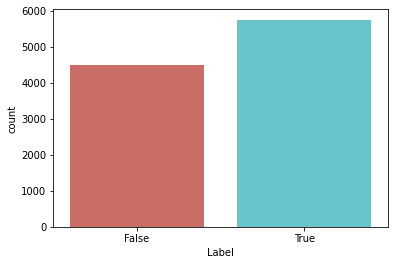

In [ ]:
create_distribution(train_news)


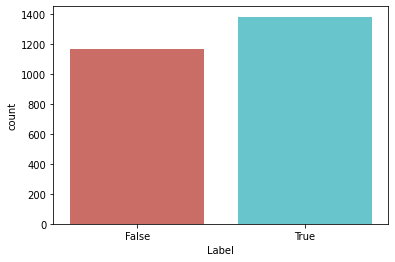

In [ ]:
create_distribution(test_news)

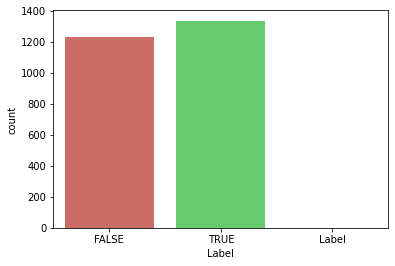

In [ ]:
create_distribution(valid_news)

In [ ]:
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['Statement'].values)

print(countV)
print(train_count)

CountVectorizer()
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1


In [ ]:
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)



In [ ]:
#building classifier using naive bayes 
nb_pipeline = Pipeline([
        ('NBCV',countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_nb = nb_pipeline.predict(test_news['Statement'])
np.mean(predicted_nb == test_news['Label'])


0.6072128577028616

In [ ]:
logR_pipeline = Pipeline([
        ('LogRCV',countV),
        ('LogR_clf',LogisticRegression(max_iter=250))
        ])

logR_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_LogR = logR_pipeline.predict(test_news['Statement'])
np.mean(predicted_LogR == test_news['Label'])

0.5985887887103096

In [ ]:
svm_pipeline = Pipeline([
        ('svmCV',countV),
        ('svm_clf',svm.LinearSVC( max_iter=1000))
        ])

svm_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_svm = svm_pipeline.predict(test_news['Statement'])
np.mean(predicted_svm == test_news['Label'])

0.5723245785966288

In [ ]:
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['Statement'] 
        train_y = train_news.iloc[train_ind]['Label']
    
        test_text =train_news.iloc[test_ind]['Statement']
        test_y =train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

In [ ]:
def plot_PR_curve(classifier):
    
    precision, recall, thresholds = precision_recall_curve(test_news['Label'], classifier)
    average_precision = average_precision_score(test_news['Label'], classifier)
    
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Average Precision={0:0.2f}'.format(average_precision))
    


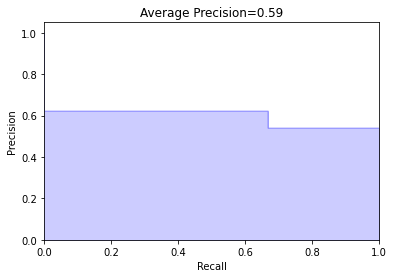

In [ ]:
plot_PR_curve(predicted_LogR)

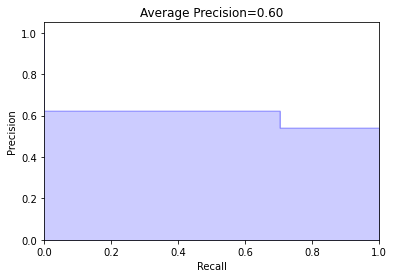

In [ ]:
plot_PR_curve(predicted_nb)

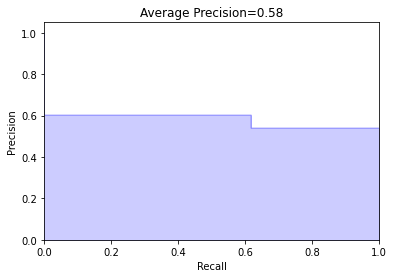

In [ ]:
plot_PR_curve(predicted_svm)

In [ ]:
build_confusion_matrix(nb_pipeline)


Total statements classified: 10240
Score: 0.66961153965076
score length 5
Confusion matrix:
[[2118 2370]
 [1664 4088]]


(None, None, None, None, None)

In [ ]:
build_confusion_matrix(logR_pipeline)


Total statements classified: 10240
Score: 0.6467945943441228
score length 5
Confusion matrix:
[[2252 2236]
 [1934 3818]]


(None, None, None, None, None)

In [ ]:
build_confusion_matrix(svm_pipeline)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Total statements classified: 10240
Score: 0.6104687487924283
score length 5
Confusion matrix:
[[2260 2228]
 [2246 3506]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


(None, None, None, None, None)

In [ ]:
#tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',tfidf_ngram),
        ('nb_clf',MultinomialNB())])

nb_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_nb_ngram == test_news['Label'])

0.5938847510780086

In [ ]:
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_LogR_ngram == test_news['Label'])


0.6193649549196394

In [ ]:
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',tfidf_ngram),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_svm_ngram = svm_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_svm_ngram == test_news['Label'])

0.6170129361034888

In [ ]:
build_confusion_matrix(nb_pipeline_ngram)
build_confusion_matrix(logR_pipeline_ngram)
build_confusion_matrix(svm_pipeline_ngram)

Total statements classified: 10240
Score: 0.7224053159841455
score length 5
Confusion matrix:
[[ 758 3730]
 [ 390 5362]]
Total statements classified: 10240
Score: 0.7044355553757985
score length 5
Confusion matrix:
[[1580 2908]
 [1043 4709]]
Total statements classified: 10240
Score: 0.6790920142902143
score length 5
Confusion matrix:
[[2016 2472]
 [1524 4228]]


(None, None, None, None, None)

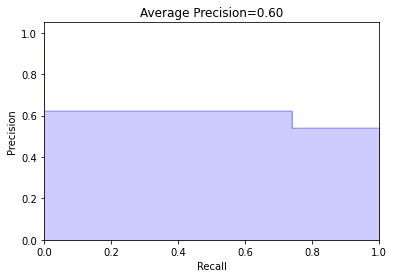

In [ ]:
plot_PR_curve(predicted_svm_ngram)

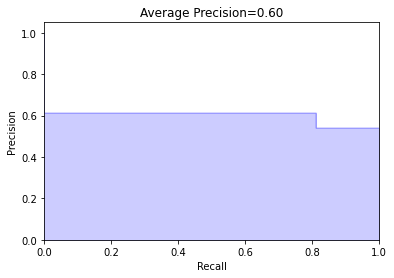

In [ ]:
plot_PR_curve(predicted_LogR_ngram)

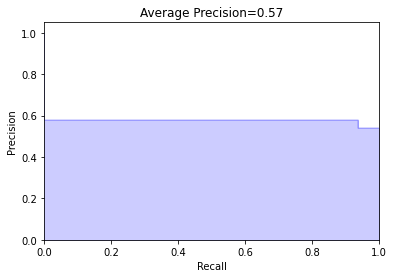

In [ ]:
plot_PR_curve(predicted_nb_ngram)

In [ ]:
print(classification_report(test_news['Label'], predicted_nb_ngram))
print(classification_report(test_news['Label'], predicted_LogR_ngram))
print(classification_report(test_news['Label'], predicted_svm_ngram))

              precision    recall  f1-score   support

       False       0.72      0.19      0.30      1169
        True       0.58      0.94      0.71      1382

    accuracy                           0.59      2551
   macro avg       0.65      0.56      0.51      2551
weighted avg       0.64      0.59      0.52      2551

              precision    recall  f1-score   support

       False       0.64      0.39      0.49      1169
        True       0.61      0.81      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551

              precision    recall  f1-score   support

       False       0.61      0.47      0.53      1169
        True       0.62      0.74      0.68      1382

    accuracy                           0.62      2551
   macro avg       0.61      0.61      0.60      2551
weighted avg       0.62      0.62      0.61      2551



In [ ]:
parameters = {'LogR_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'LogR_tfidf__use_idf': (True, False),
               'LogR_tfidf__smooth_idf': (True, False)
}

gs_clf = GridSearchCV(logR_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train_news['Statement'][:10000],train_news['Label'][:10000])



In [ ]:
gs_clf.best_score_


0.6165

In [ ]:

gs_clf.best_params_


{'LogR_tfidf__ngram_range': (1, 4),
 'LogR_tfidf__smooth_idf': True,
 'LogR_tfidf__use_idf': True}

In [ ]:
gs_clf.cv_results_

{'mean_fit_time': array([0.61847506, 0.49662623, 0.5901165 , 0.503793  , 1.77654834,
        1.86768451, 1.64319696, 1.76870332, 2.64070363, 3.11479988,
        2.42740912, 3.27746234, 3.09306693, 3.91978703, 3.20275593,
        3.87740855, 3.90503783, 4.64575329, 4.26033726, 4.47180543]),
 'mean_score_time': array([0.05963554, 0.06044612, 0.06171784, 0.05774488, 0.10004854,
        0.09479866, 0.10217938, 0.08903894, 0.11722159, 0.11979194,
        0.127987  , 0.12435923, 0.15018864, 0.14952083, 0.15109501,
        0.14733233, 0.17900062, 0.16787696, 0.17187896, 0.15623813]),
 'mean_test_score': array([0.6046, 0.6106, 0.6055, 0.6106, 0.6142, 0.6105, 0.614 , 0.6105,
        0.6149, 0.6103, 0.6162, 0.6103, 0.6165, 0.6097, 0.6159, 0.6097,
        0.616 , 0.6093, 0.6151, 0.6093]),
 'param_LogR_tfidf__ngram_range': masked_array(data=[(1, 1), (1, 1), (1, 1), (1, 1), (1, 2), (1, 2), (1, 2),
                    (1, 2), (1, 3), (1, 3), (1, 3), (1, 3), (1, 4), (1, 4),
                    (1, 4)

In [ ]:
logR_pipeline_final = Pipeline([
        ('LogR_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=False)),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_final.fit(train_news['Statement'],train_news['Label'])
predicted_LogR_final = logR_pipeline_final.predict(test_news['Statement'])
np.mean(predicted_LogR_final == test_news['Label'])
print(classification_report(test_news['Label'], predicted_LogR_final))



              precision    recall  f1-score   support

       False       0.63      0.38      0.48      1169
        True       0.61      0.81      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551



In [ ]:
model_file = 'final_model.sav'
pickle.dump(logR_pipeline_ngram,open(model_file,'wb'))

In [ ]:
def show_most_informative_features(model, vect, clf, text=None, n=50):
    # Extract the vectorizer and the classifier from the pipeline
    vectorizer = model.named_steps[vect]
    classifier = model.named_steps[clf]

     # Check to make sure that we can perform this computation
    if not hasattr(classifier, 'coef_'):
        raise TypeError(
            "Cannot compute most informative features on {}.".format(
                classifier.__class__.__name__
            )
        )
            
    if text is not None:
        # Compute the coefficients for the text
        tvec = model.transform([text]).toarray()
    else:
        # Otherwise simply use the coefficients
        tvec = classifier.coef_

    # Zip the feature names with the coefs and sort
    coefs = sorted(
        zip(tvec[0], vectorizer.get_feature_names()),
        reverse=True
    )
    
    # Get the top n and bottom n coef, name pairs
    topn  = zip(coefs[:n], coefs[:-(n+1):-1])

    # Create the output string to return
    output = []

    # If text, add the predicted value to the output.
    if text is not None:
        output.append("\"{}\"".format(text))
        output.append(
            "Classified as: {}".format(model.predict([text]))
        )
        output.append("")

    # Create two columns with most negative and most positive features.
    for (cp, fnp), (cn, fnn) in topn:
        output.append(
            "{:0.4f}{: >15}    {:0.4f}{: >15}".format(
                cp, fnp, cn, fnn
            )
        )
    #return "\n".join(output)
    print(output)


In [ ]:
show_most_informative_features(logR_pipeline_ngram,vect='LogR_tfidf',clf='LogR_clf')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['2.8908        percent    -1.7942      obamacare', '1.7637        average    -1.6300           says', '1.6477          times    -1.4106          obama', '1.5998            day    -1.3994           plan', '1.4585        million    -1.2839            rep', '1.4521        georgia    -1.2085      wisconsin', '1.4321      countries    -1.1150           care', '1.4306           debt    -1.0474   scott walker', '1.4227        country    -1.0360         walker', '1.3848        highest    -1.0130       increase', '1.3639       american    -0.9904       medicare', '1.3051           half    -0.9826        clinton', '1.2677            000    -0.9775          scott', '1.1009         states    -0.9539     government', '1.0707         months    -0.9498          going', '0.9916         lowest    -0.9253         obamas', '0.9890             10    -0.9121           away', '0.9856       actually    -0.8947      president', '0.9699         nearly    -0.8871          group', '0.9656          years    -0.8

In [ ]:
show_most_informative_features(nb_pipeline_ngram,vect='nb_tfidf',clf='nb_clf')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['-8.3592           says    -12.2914             00', '-8.4905        percent    -12.2914        00 2014', '-8.9000          state    -12.291400 2014 provisions', '-8.9871            000    -12.291400 2014 provisions incorporated', '-9.0369          years    -12.2914   000 000 send', '-9.0583           year    -12.2914000 000 send community', '-9.0788         states    -12.2914000 000 support', '-9.1049            tax    -12.2914000 000 support supreme', '-9.1206        million    -12.2914         000 10', '-9.1603         people    -12.2914     000 10 000', '-9.1698          obama    -12.2914000 10 000 refugees', '-9.2866           jobs    -12.2914     000 20 000', '-9.3095         health    -12.2914000 20 000 infrastructural', '-9.3195      president    -12.2914000 20 000 jobs', '-9.3506        country    -12.2914         000 25', '-9.3991          texas    -12.2914     000 25 000', '-9.3995            new    -12.2914000 25 000 federal', '-9.4850          taxes    -12.2914  000 40 00

In [ ]:
show_most_informative_features(svm_pipeline_ngram,vect='svm_tfidf',clf='svm_clf')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1.8707        percent    -1.4757      obamacare', '1.6936      countries    -1.2105            rep', '1.6539        average    -1.1936           plan', '1.6317            day    -1.1096          group', '1.6210          times    -1.1001          obama', '1.5165        georgia    -1.0898           says', '1.2959       american    -1.0880           away', '1.2499           half    -1.0773      wisconsin', '1.2222           debt    -1.0312         gotten', '1.1749         months    -0.9794           isis', '1.1689        million    -0.9710       war iraq', '1.1270        country    -0.9663       increase', '1.0838            000    -0.9563        illegal', '1.0822       actually    -0.9513    500 billion', '1.0279        highest    -0.9330          china', '1.0227         cities    -0.9257       vacation', '0.9875          terms    -0.9149           real', '0.9781        decades    -0.8944   scott walker', '0.9575          worst    -0.8813           team', '0.9428   percent time    -0.8

In [ ]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

In [ ]:
def detecting_fake_news(var):    
#retrieving the best model for prediction call
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("The given statement is ",prediction[0]),
        print("The truth probability score is ",prob[0][1]))




In [ ]:
if __name__ == '__main__':
    detecting_fake_news(var)